### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df_tr = pd.read_csv(r"C:\Users\ADMIN\Downloads\Rohan\train.csv")
df_ts = pd.read_csv(r"C:\Users\ADMIN\Downloads\Rohan\test.csv")

In [3]:
df_tr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df_ts

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Information

- Age
: The age of the customer.
- Job
: The occupation/employment status of the customer.
- Marital
: The marital status of the customer.
- Education
: The education level attained by the customer.
- Default
: Whether the customer has credit in default or not.
- Balance
: The balance in the customer's account.
- Housing
: Whether the customer has a housing loan or not.
- Contact
: Type of communication used to contact customers (phone, cellular, etc.).
- Day
: Day of the month when customers were last contacted.
- Duration
: Duration (in seconds) of the last contact with customers during the previous campaign.
- Pdays
: The number of days passed by after contact from the previous campaign.
- Poutcome
: Outcome from the previous marketing campaign.

### Data preprocessing

In [5]:
df_tr.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_ts.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_tr.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df_tr.shape

(45211, 17)

In [10]:
df_tr.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
df_tr.duplicated().sum()

0

In [12]:
df_tr.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### EDA - Exploratory Data Analysis

#### Age Feature

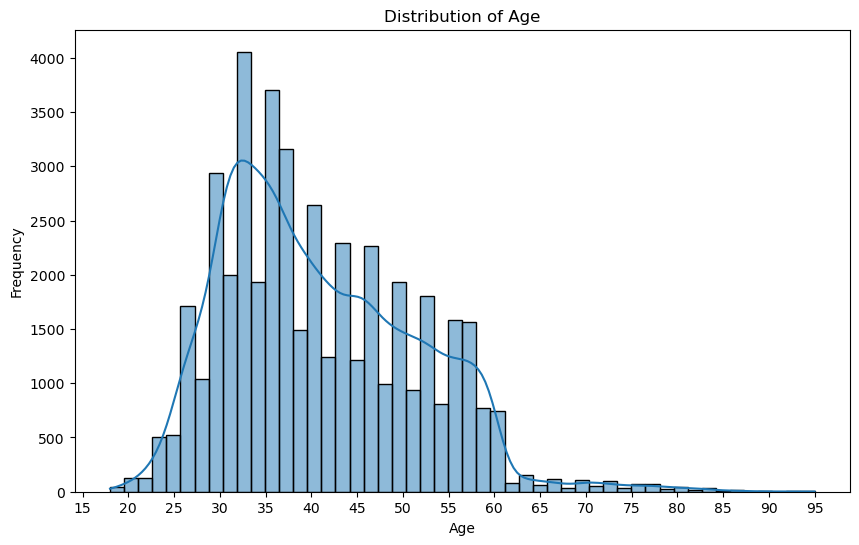

In [13]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df_tr['age'], bins=50, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15,100,5)])
plt.show()

#### Job Feature

In [14]:
df_tr['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

#### Rename "unknown" values with "others"

In [15]:
df_tr['job'] = df_tr['job'].replace('unknown','others')
df_tr['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: job, dtype: int64

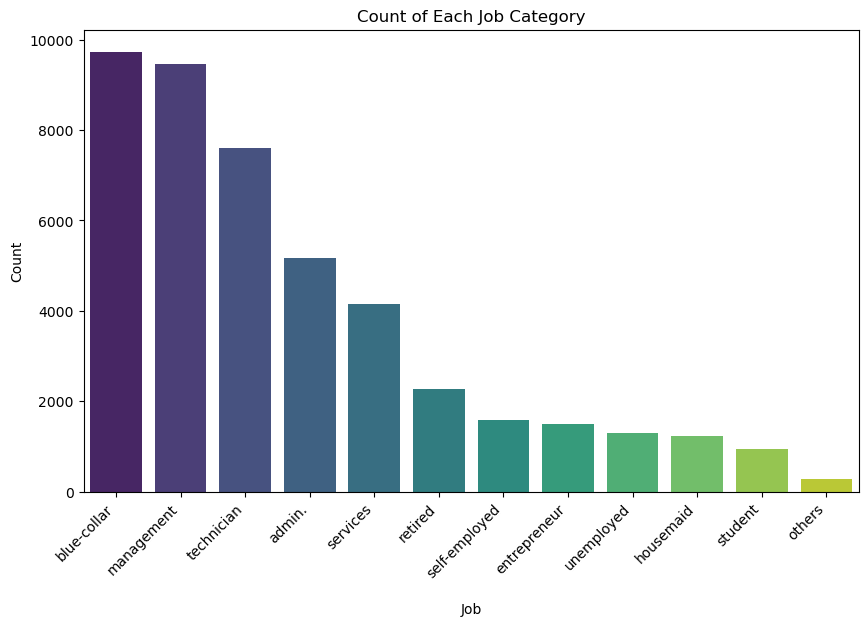

In [16]:
job_counts = df_tr['job'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
df_ts['job'] = df_ts['job'].replace('unknown', 'others')
df_ts['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: job, dtype: int64

#### Marital-Status Feature

In [18]:
df_tr['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

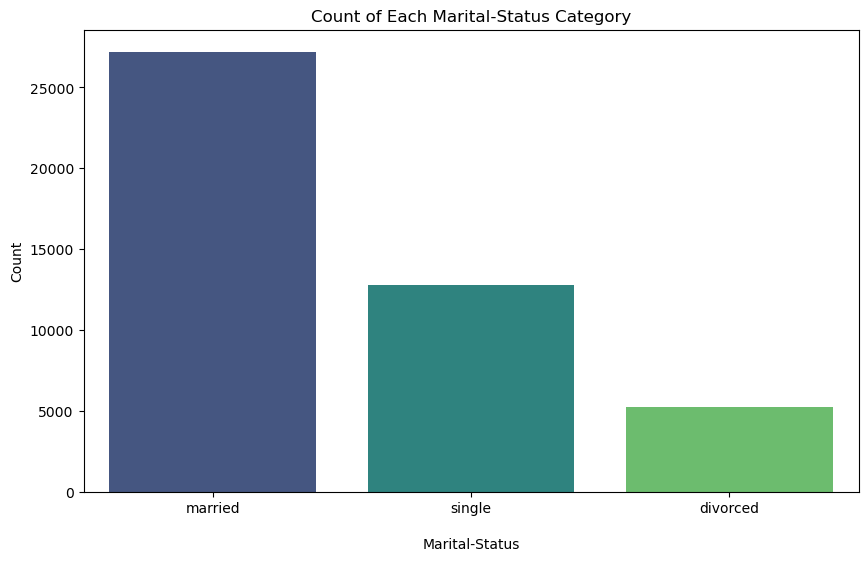

In [19]:
marital_counts = df_tr['marital'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')
plt.show()

#### Educational Feature

In [20]:
df_tr['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

#### Rename "unknown" values with "others"

In [21]:
df_tr['education'] = df_tr['education'].replace('unknown', 'others')
df_tr['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
others        1857
Name: education, dtype: int64

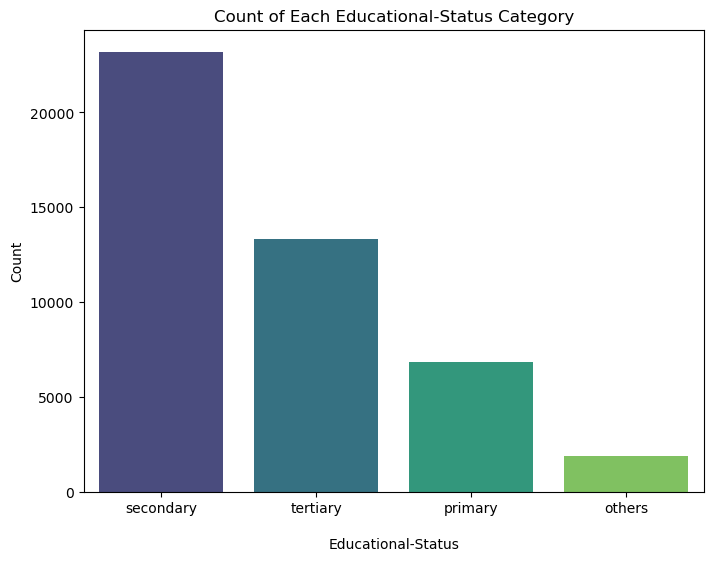

In [22]:
education_counts = df_tr['education'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')
plt.show()

In [23]:
df_ts['education'] = df_ts['education'].replace('unknown', 'others')
df_ts['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
others        187
Name: education, dtype: int64

#### Credit in Default Feature

In [24]:
df_tr['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

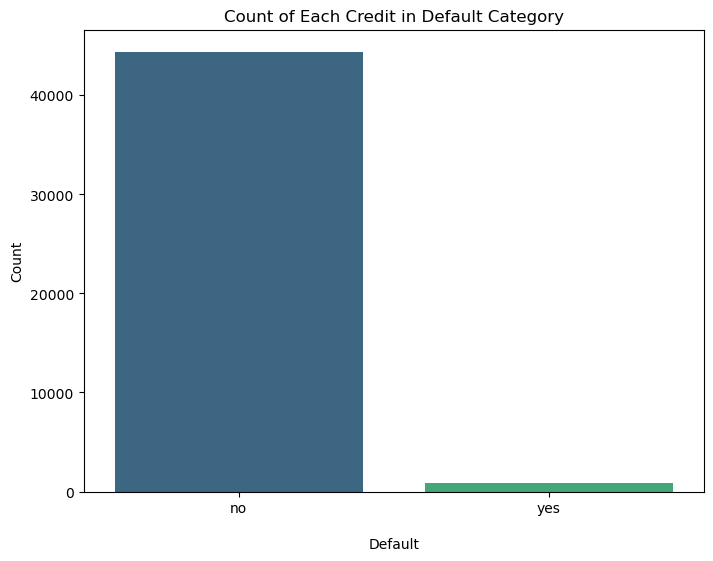

In [25]:
default_counts = df_tr['default'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')
plt.show()

#### This feature is worthless, the "no" values is so poor, so I'll drop it.

In [26]:
df_tr.drop('default',axis=1,inplace=True)
df_ts.drop('default',axis=1,inplace=True)

#### Housing Loan Feature

In [27]:
df_tr['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

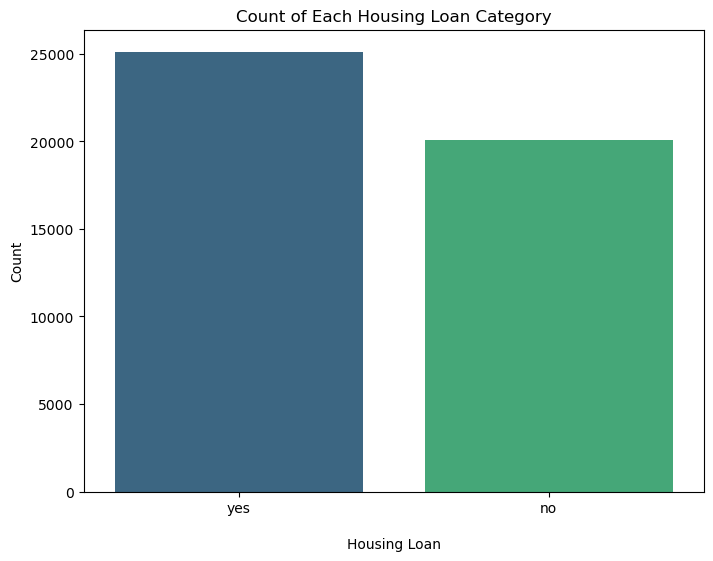

In [28]:
housing_counts = df_tr['housing'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='viridis')
plt.title('Count of Each Housing Loan Category')
plt.xlabel('\nHousing Loan')
plt.ylabel('Count')
plt.show()

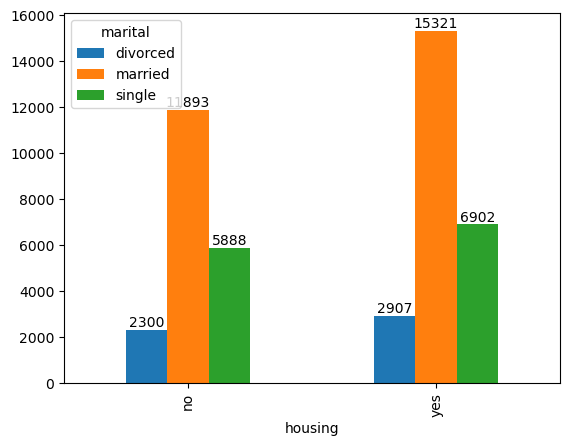

In [29]:
x=pd.crosstab(df_tr.housing,df_tr.marital).plot(kind="bar");
for i in x.containers:
    x.bar_label(i)

#### Loan Feature

In [30]:
df_tr['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

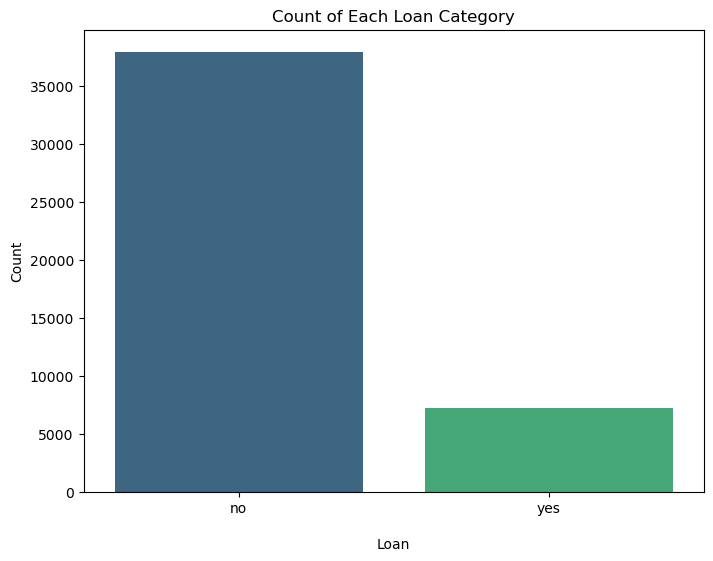

In [31]:
loan_counts = df_tr['loan'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='viridis')
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')
plt.show()

#### Contact Feature

In [32]:
df_tr['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

#### Rename "unknown" values with "others"

In [33]:
df_tr['contact'] = df_tr['contact'].replace('unknown', 'others')
df_tr['contact'].value_counts()

cellular     29285
others       13020
telephone     2906
Name: contact, dtype: int64

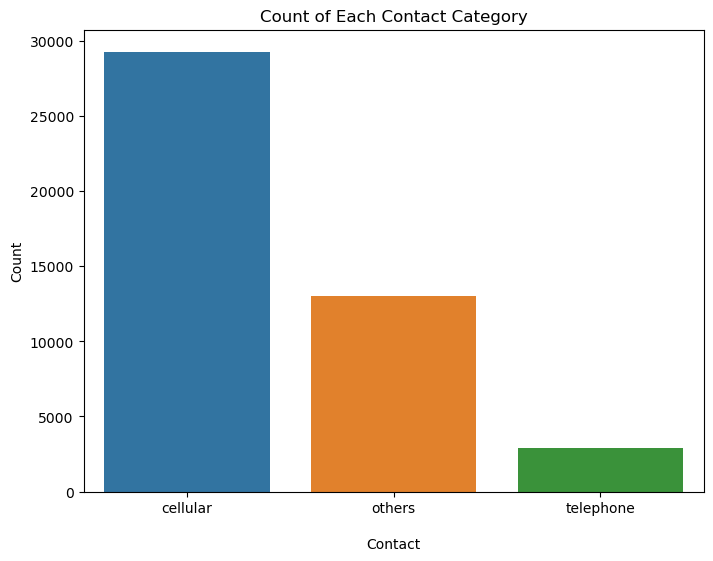

In [34]:
contact_counts = df_tr['contact'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=contact_counts.index, y=contact_counts.values)
plt.title('Count of Each Contact Category')
plt.xlabel('\nContact')
plt.ylabel('Count')
plt.show()

In [35]:
df_ts['contact'] = df_ts['contact'].replace('unknown', 'others')
df_ts['contact'].value_counts()

cellular     2896
others       1324
telephone     301
Name: contact, dtype: int64

#### Day Feature

In [36]:
df_tr['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

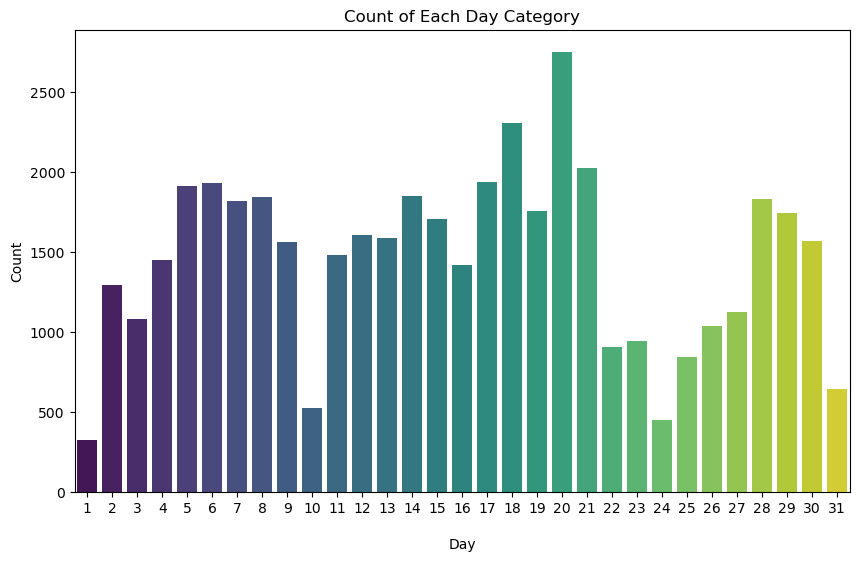

In [37]:
day_counts = df_tr['day'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Count of Each Day Category')
plt.xlabel('\nDay')
plt.ylabel('Count')
plt.show()

#### Month Feature

In [38]:
df_tr['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

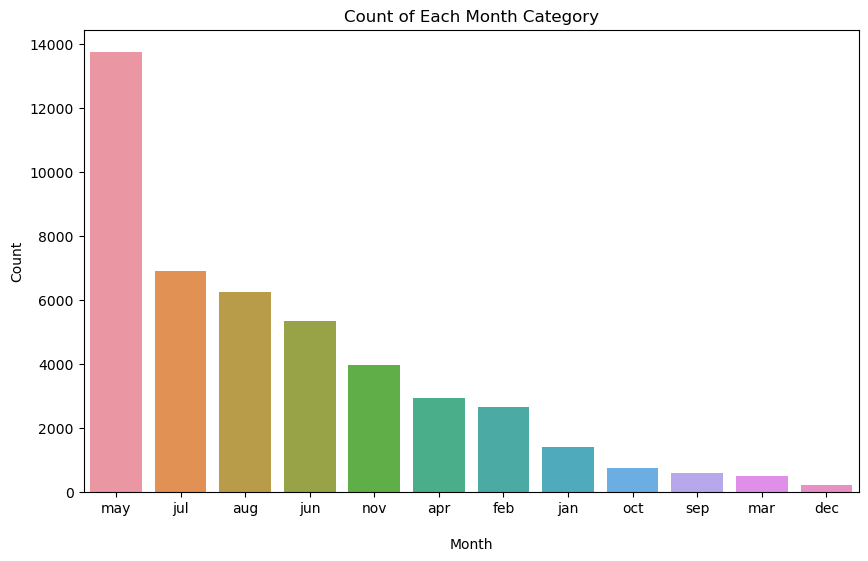

In [39]:
month_counts = df_tr['month'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')
plt.show()

#### Duration Feature

In [40]:
df_tr['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

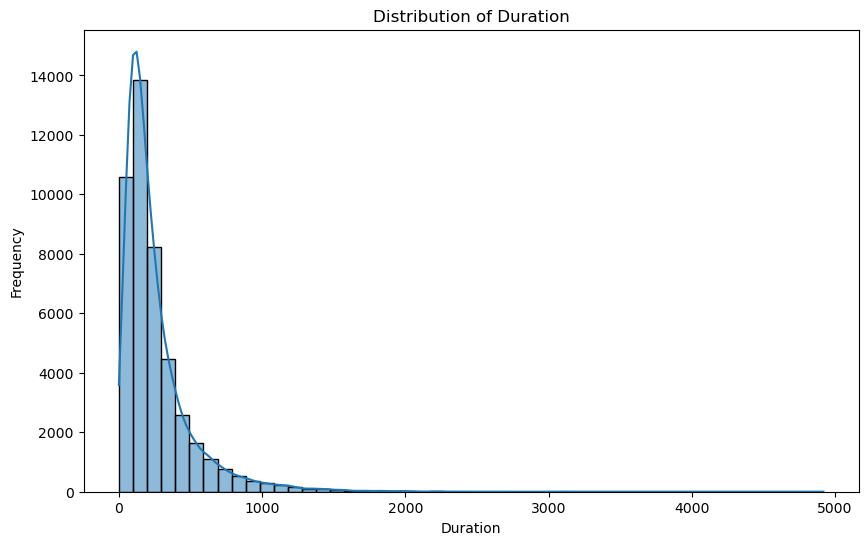

In [41]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df_tr['duration'], bins=50, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

#### Campaign Feature

In [42]:
df_tr['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

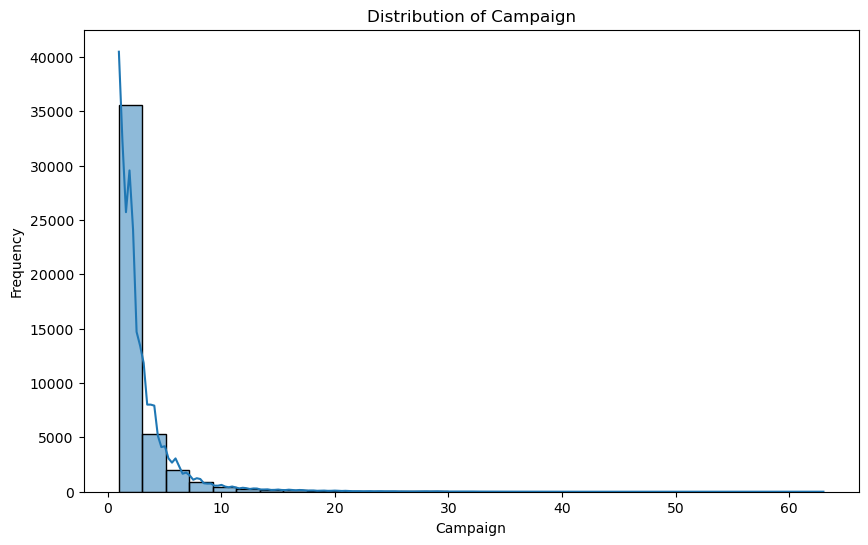

In [43]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df_tr['campaign'], bins=30, kde=True)
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

#### Passed Days Feature

In [44]:
filtered_data = df_tr[df_tr['pdays'] != -1]

In [45]:
filtered_data['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

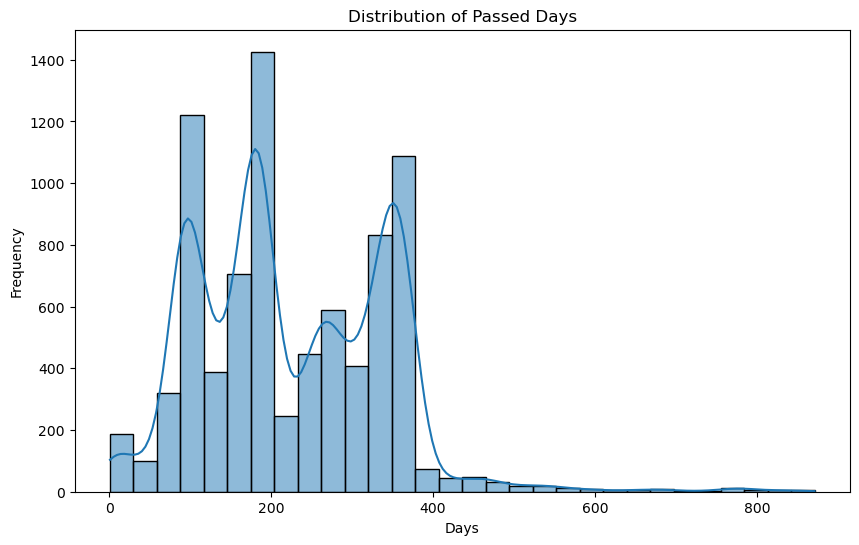

In [46]:
plt.figure(figsize=(10,6))
ax = sns.histplot(filtered_data['pdays'], bins=30, kde=True)
plt.title('Distribution of Passed Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

#### Previous Contacts Feature

In [47]:
df_tr['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

#### This feature is useless, the most of values have 0 value. So I'll drop it.

In [48]:
df_tr.drop('previous', axis=1, inplace=True)
df_ts.drop('previous', axis=1, inplace=True)

#### Previous Outcome Feature

In [49]:
df_tr['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

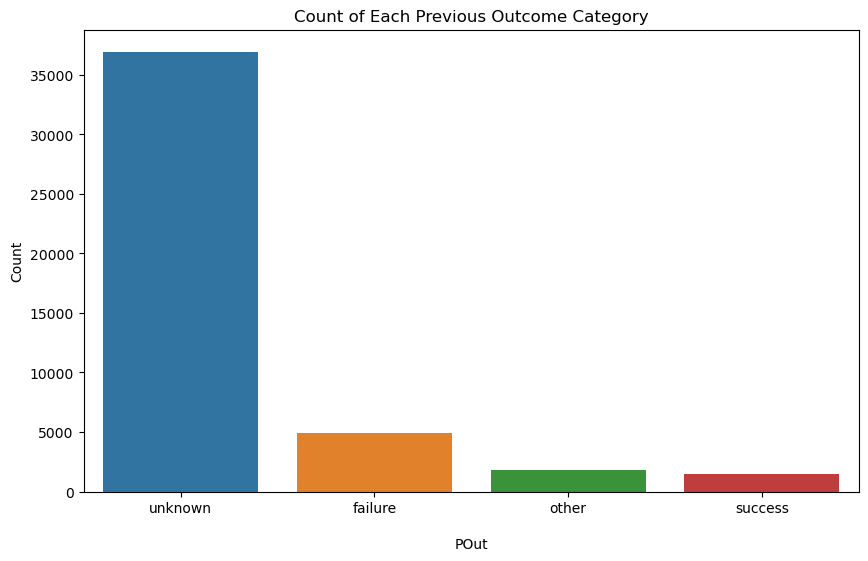

In [50]:
pout_counts = df_tr['poutcome'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=pout_counts.index, y=pout_counts.values)
plt.title('Count of Each Previous Outcome Category')
plt.xlabel('\nPOut')
plt.ylabel('Count')
plt.show()

#### This feature is useless, the most of values are unknowns. So I'll drop it.

In [51]:
df_tr.drop('poutcome', axis=1, inplace=True)
df_ts.drop('poutcome', axis=1, inplace=True)

#### Y (Target Column) Feature

In [52]:
df_tr['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

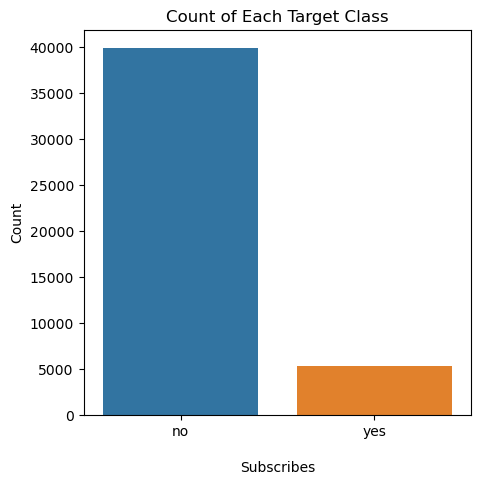

In [53]:
target_counts = df_tr['y'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')
plt.show()

### Encoding

#### Converting Categorical data into numeric data

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df_tr = df_tr.apply(LabelEncoder().fit_transform)

In [56]:
df_tr.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,3036,1,0,1,4,8,261,0,0,0
1,26,10,2,2,945,1,0,1,4,8,151,0,0,0
2,15,2,1,2,918,1,1,1,4,8,76,0,0,0
3,29,1,1,0,2420,1,0,1,4,8,92,0,0,0
4,15,5,2,0,917,0,0,1,4,8,198,0,0,0


In [57]:
df_ts = df_ts.apply(LabelEncoder().fit_transform)

In [58]:
df_ts.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0


In [59]:
df_tr.corr()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
age,1.000000,-0.019709,-0.403258,-0.173602,0.119073,-0.185510,-0.015650,0.122119,-0.009118,-0.042359,-0.006796,0.005023,-0.024404,0.025130
job,-0.019709,1.000000,0.059687,0.131434,0.021036,-0.114208,-0.026211,-0.062947,0.023428,-0.088383,0.006196,0.002787,-0.021665,0.041673
marital,-0.403258,0.059687,1.000000,0.095415,0.006913,-0.016096,-0.046893,-0.041258,-0.005261,-0.006991,0.012364,-0.009176,0.019636,0.045588
education,-0.173602,0.131434,0.095415,1.000000,0.050559,-0.038689,0.004307,-0.156922,0.021661,-0.070679,0.001923,0.000620,0.005769,0.051341
balance,0.119073,0.021036,0.006913,0.050559,1.000000,-0.078896,-0.114077,0.001635,0.010893,0.023925,0.038270,-0.025987,0.012325,0.082873
housing,-0.185510,-0.114208,-0.016096,-0.038689,-0.078896,1.000000,0.041323,0.089783,-0.027982,0.271481,0.005878,-0.024178,0.127521,-0.139173
loan,-0.015650,-0.026211,-0.046893,0.004307,-0.114077,0.041323,1.000000,-0.015964,0.011370,0.022145,-0.013354,0.010102,-0.022699,-0.068185
contact,0.122119,-0.062947,-0.041258,-0.156922,0.001635,0.089783,-0.015964,1.000000,-0.006302,0.263207,-0.035157,0.046949,-0.173132,-0.100822
day,-0.009118,0.023428,-0.005261,0.021661,0.010893,-0.027982,0.011370,-0.006302,1.000000,-0.006028,-0.032022,0.163353,-0.094545,-0.028348
month,-0.042359,-0.088383,-0.006991,-0.070679,0.023925,0.271481,0.022145,0.263207,-0.006028,1.000000,0.006096,-0.111055,0.031766,-0.024471


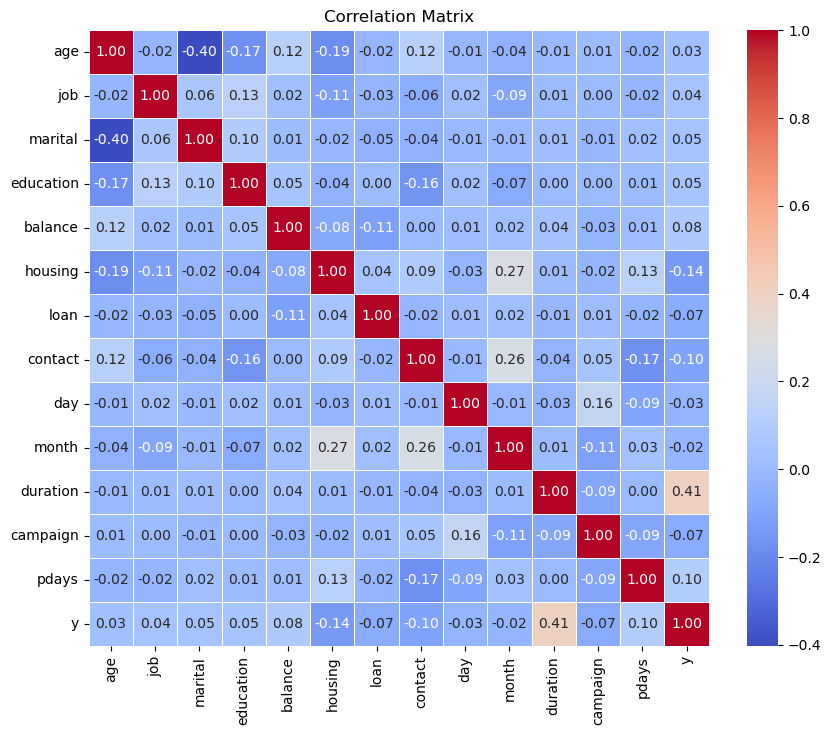

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_tr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Model Creation

In [61]:
X_train = df_tr.iloc[:, :-1]
y_train = df_tr.iloc[:, -1]

In [62]:
X_test = df_ts.iloc[:, :-1]
y_test = df_ts.iloc[:, -1]

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
model.score(X_train, y_train)

0.8870850014377032

In [67]:
model.score(X_test, y_test)

0.8840964388409643

In [68]:
y_pred = model.predict(X_test)

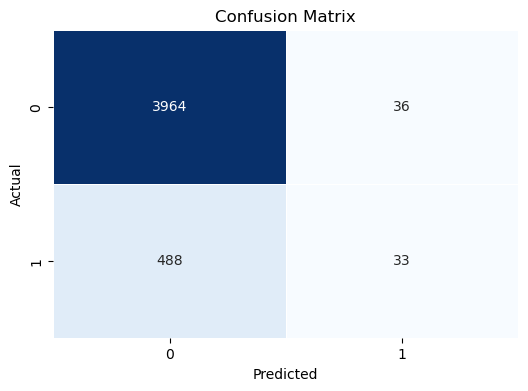

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.48      0.06      0.11       521

    accuracy                           0.88      4521
   macro avg       0.68      0.53      0.52      4521
weighted avg       0.84      0.88      0.84      4521

